<a href="https://colab.research.google.com/github/skyteck8/BigDataMachineLearning/blob/main/Celsius_a_Fahrenheit_Exportaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Codigo general
#Si quieres ver como lo programamos, revisa el video donde lo explico
#todo desde cero: https://youtu.be/iX_on3VxZzk

import tensorflow as tf
import numpy as np

celsiusArr = []
fahrenheitArr = []
for i in range(1000):
  celsiusArr.append(i)

print(celsiusArr)

for i in range(1000):
  fahrenheitArr.append(celsiusArr[i]*1.8 + 32)

print(fahrenheitArr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [16]:
celsius = np.array(celsiusArr, dtype=float)
fahrenheit = np.array(fahrenheitArr, dtype=float)

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.RootMeanSquaredError()]
)

print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=100, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


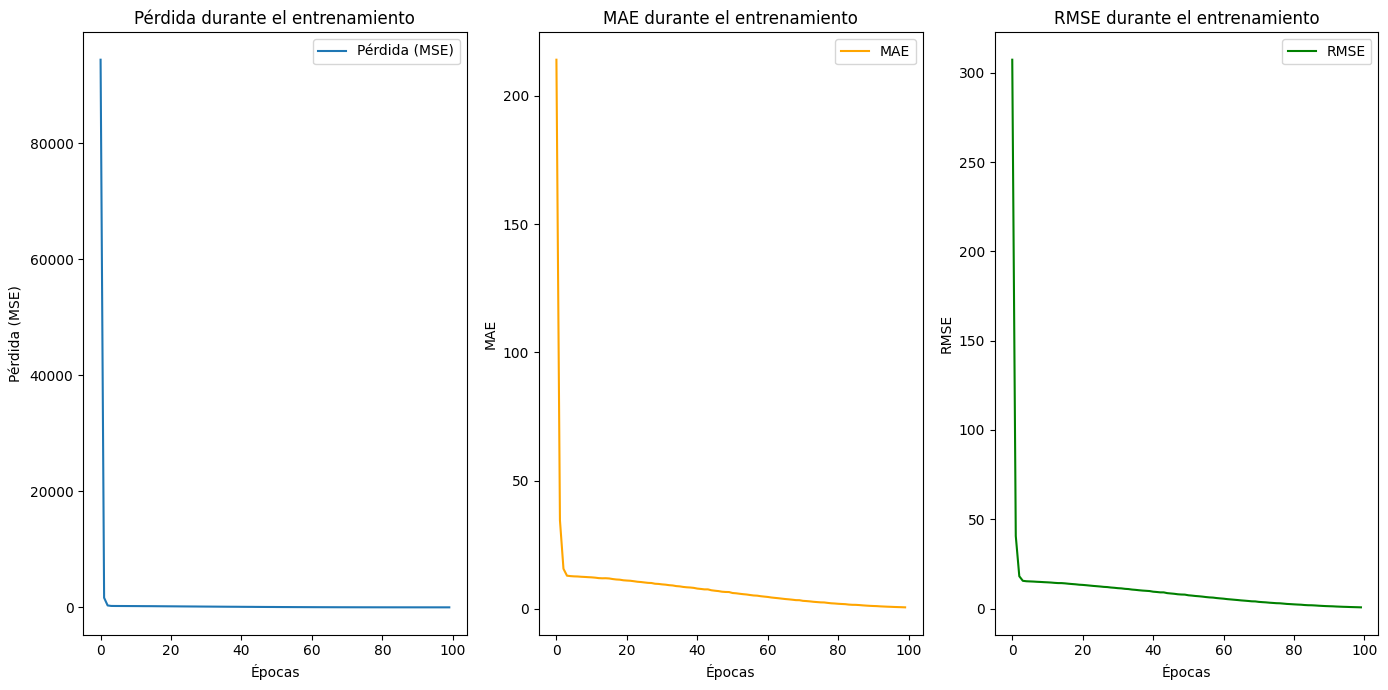

In [17]:
import matplotlib.pyplot as plt

# Extraer las métricas del historial
perdida = historial.history['loss']
mae = historial.history['mean_absolute_error']
rmse = historial.history['root_mean_squared_error']

# Crear una gráfica para la pérdida
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(perdida, label='Pérdida (MSE)')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.legend()

# Crear una gráfica para el Error Absoluto Medio
plt.subplot(1, 3, 2)
plt.plot(mae, label='MAE', color='orange')
plt.title('MAE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()

# Crear una gráfica para la Raíz del Error Cuadrático Medio
plt.subplot(1, 3, 3)
plt.plot(rmse, label='RMSE', color='green')
plt.title('RMSE durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
resultado = modelo.predict([100.0])
print("Prediccion: 100 grados celsius son " + str(resultado) + " fahrenheit!")

1/1 [==============================] - 0s 97ms/step
Prediccion: 100 grados celsius son [[211.9793]] fahrenheit!


In [11]:
#Exportar el modelo en formato h5
modelo.save('celsius_a_fahrenheit.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
#El equipo es Linux. Listemos el contenido de la carpeta actual para ver que se exporto el modelo
!ls

celsius_a_fahrenheit.h5  sample_data


In [13]:
#Para convertirlo a tensorflow.js, primero debemos instalar la libreria
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 820.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 54.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
  Attempting uninstall: ml-dtypes
  

In [18]:
#Crear carpeta donde se colocaran los archivos resultantes
!mkdir carpeta_salida

In [19]:
#Realizar la exportacion a la carpeta de salida
!tensorflowjs_converter --input_format keras celsius_a_fahrenheit.h5 carpeta_salida

2024-05-04 19:33:25.071690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
#Confirmar que en la carpeta de salida se hayan generado los archivos. Deben aparecer archivos "bin" y "json"
!ls carpeta_salida

group1-shard1of1.bin  model.json


In [ ]:
#Para descargarlos, da clic del lado izquierdo en el icono de la carpeta
#y expande carpeta_salida. En los archivos utiliza los 3 puntos para descargarlos